In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [3]:
x = mnist['data']
y = mnist['target']

In [4]:
print(x.shape)
print(y.shape)

(70000, 784)
(70000,)


In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt

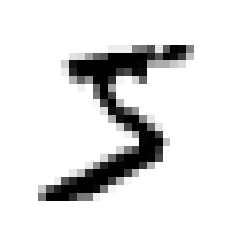

In [8]:
some_digit = x.loc[0].to_numpy()
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap = mpl.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()

In [9]:
y[0]

'5'

In [10]:
y = y.astype('uint8')

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [12]:
print(x_train.shape)
print(x_test.shape)

(56000, 784)
(14000, 784)


In [13]:
y_train_6 = (y_train == 6)
y_test_6 = (y_test == 6)

In [14]:
from sklearn.linear_model import SGDClassifier

In [35]:
clf = SGDClassifier(random_state=42)
clf.fit(x_train, y_train_6)

SGDClassifier(random_state=42)

In [36]:
clf.score(x_train, y_train_6)

0.973375

In [40]:
clf.predict(x_train)

array([False, False, False, ..., False, False, False])

---
# Cross Validation 

In [17]:
from sklearn.model_selection import cross_val_score

In [18]:
cross_val_score(clf, x_train, y_train_6, cv=3, scoring='accuracy')

array([0.97798254, 0.95719719, 0.96035573])

## Predicting values using cross_val_prediction()

In [19]:
from sklearn.model_selection import cross_val_predict 

In [20]:
y_predicted = cross_val_predict(clf, x_train, y_train_6, cv=3)
print(y_predicted)

[ True False False ... False False False]


---
## Using different metrics

### Confusion matrix

In [21]:
from sklearn.metrics import confusion_matrix

In [22]:
con_mtrx = confusion_matrix(y_train_6, y_predicted)
print(con_mtrx)

[[48851  1669]
 [  281  5199]]


In [23]:
import seaborn as sns

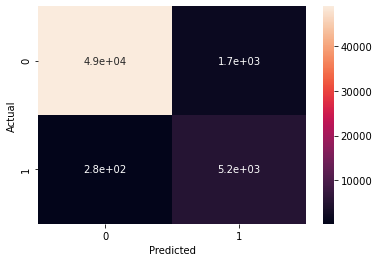

In [24]:
sns.heatmap(con_mtrx, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Precision

In [25]:
from sklearn.metrics import precision_score

In [26]:
precision_score(y_train_6, y_predicted)

0.7569889341875364

### Recall

In [27]:
from sklearn.metrics import recall_score

In [28]:
recall_score(y_train_6, y_predicted)

0.9487226277372263

### F1_score

#### F-score vs Accuracy
There are a number of metrics which can be used to evaluate a binary classification model, and accuracy is one of the simplest to understand. Accuracy is defined as simply the number of correctly categorized examples divided by the total number of examples. Accuracy can be useful but does not take into account the subtleties of class imbalances, or differing costs of false negatives and false positives.

**The F1-score is useful:**

* where there are either differing costs of false positives or false negatives, such as in the mammogram example

* or where there is a large class imbalance, such as if 10% of apples on trees tend to be unripe. In this case the accuracy would be misleading, since a classifier that classifies all apples as ripe would automatically get 90% accuracy but would be useless for real-life applications.

The accuracy has the advantage that it is very easily interpretable, but the disadvantage that it is not robust when the data is unevenly distributed, or where there is a higher cost associated with a particular type of error.

https://deepai.org/machine-learning-glossary-and-terms/f-score

In [29]:
from sklearn.metrics import f1_score
f1_score(y_train_6, y_predicted)

0.8420796890184645

### Use decision_function() to find scores.

In [33]:
prediction_scores = clf.decision_function(x_train)
print(prediction_scores[:5])

[ -1033.19478408 -16904.05897259 -19576.0053562   -9110.11011199
  -9748.40178083]


In [31]:
threshold=0
prediction_scores[:5]>0

array([False, False, False, False, False])

### Use cross_val_predict to find the decision score for all data sete

In [32]:
scores = cross_val_predict(clf, x_train, y_train_6, cv=3, method='decision_function')
print(scores[:5])

[   636.50826229 -25276.6427686  -40844.93642444 -18039.51879518
 -12749.13423836]


### plotting precision and recall vs all thresholds possible to decide the best threshold for your case
**Using precision_recall_curve() function**

In [41]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_6, scores)

* Scores: is used to compare with the specific threshold then it's compared to the y_train_6 to get possible values of precision and recall to return the corresponding values.
* then we can plot those values versus thresholds.

In [44]:
def curve_plotting(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], 'b--', label='Precision')
    plt.plot(thresholds, recalls[:-1], 'g-', label='Recall', linewidth=2)
    plt.legend(loc="center right", fontsize=16) 
    plt.xlabel("Threshold", fontsize=16)        
    plt.grid(True)                              
    plt.axis([-50000, 50000, 0, 1])   

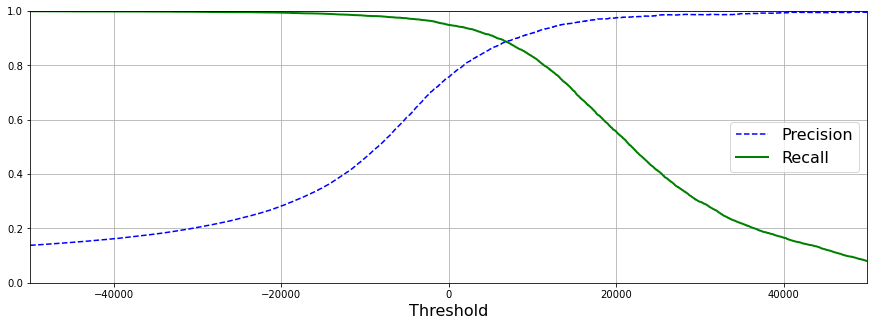

In [45]:
plt.figure(figsize=(15, 5))
curve_plotting(precisions, recalls, thresholds)

**Now we can pick a specific threshold based on value of precision or recall we want**\
**Suppose we want our (precision=90%) so we are gonna find the best corresponding threshold based on that condition**

**First**
* We need to find the index of the precision whose value >= 0.9 which corresponds to a specific threshold and with a corresponding Recall value.
* precisions = [0.158623, 0.1792, ... , 0.899532, (0.9124), 0.9861, ...]

**The index of (0.9124) is corresponding to the value of threshold at that index and so we will use it**

In [61]:
# index of the first precision that is >= 0.9
index = np.argmax(precisions >= 0.9)
print(f'Index = ({index})')

Index = (41194)


In [62]:
# Threshold for precision=0.9
thrd_90_pres = thresholds[index]
print(f'threshold = ({thrd_90_pres})')

threshold = (8104.411047346578)


In [60]:
# The corresponding recall value:
recall_90_pres = recalls[index]
print(f'Recall = ({recall_90_pres})')

Recall = (0.8666058394160584)


**Now tresting our estimations about threshold**
* first we compare the scores with the treshold so we can get our predictions based on that threshold.
* second we compute our precision and recall to see if they are equla to the correspoding values.

In [68]:
y_90_pres = (scores >= thrd_90_pres)

In [69]:
# Precision, should be 0.9 or more
precision_score(y_train_6, y_90_pres)

0.9001137225170583

In [72]:
# recall, shold be as computed above
recall_score(y_train_6, y_90_pres)

0.8666058394160584

**Plotting all together**

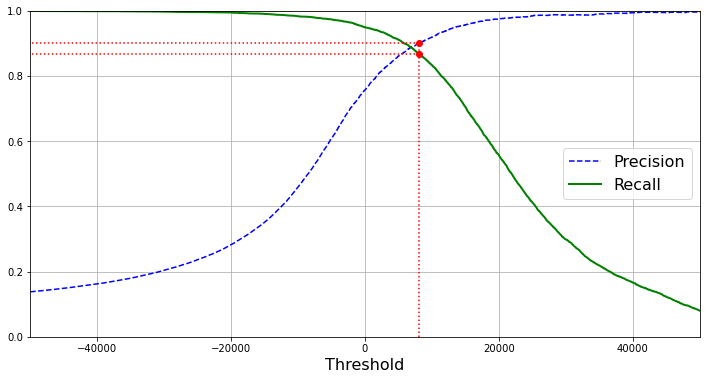

In [74]:
plt.figure(figsize=(12,6))
curve_plotting(precisions, recalls, thresholds)
plt.plot([thrd_90_pres, thrd_90_pres], [0, 0.9], ':r')
plt.plot([thrd_90_pres, -50000], [0.9, 0.9], ':r')
plt.plot([thrd_90_pres, -50000], [recall_90_pres, recall_90_pres], ':r')
plt.plot([thrd_90_pres], [0.9], 'ro')
plt.plot([thrd_90_pres], [recall_90_pres], 'ro')
plt.show()

___
### Pick a specific recall and find the corresponding precision:


In [104]:
index = np.argmax(recalls<=0.8)
print('index:', index)

index: 41772


In [105]:
thrd_80_recall = thresholds[index]
pres_80_recall = precisions[index]
print('threshold:', thrd_80_recall)
print('Precision:', pres_80_recall)

threshold: 11398.587794655536
Precision: 0.9331630481055768


In [106]:
y_80_recall = scores>= thrd_80_recall

In [107]:
precision_score(y_train_6, y_80_recall)

0.9331630481055768

In [108]:
recall_score(y_train_6, y_80_recall)

0.8

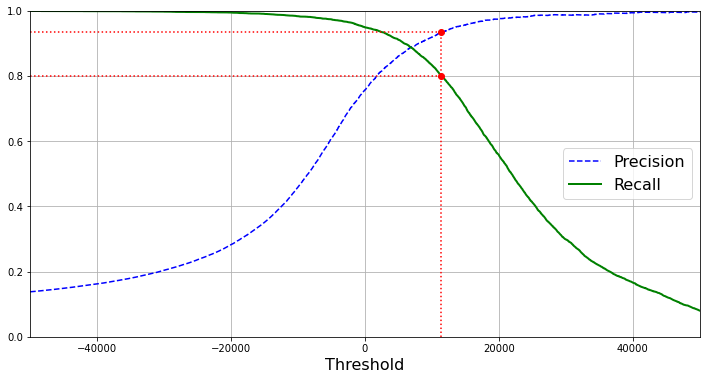

In [111]:
plt.figure(figsize=(12, 6))
curve_plotting(precisions, recalls, thresholds)
plt.plot([thrd_80_recall, thrd_80_recall], [0.0, pres_80_recall], 'r:')
plt.plot([thrd_80_recall, -50000], [0.8, 0.8], 'r:')
plt.plot([thrd_80_recall, -50000], [pres_80_recall, pres_80_recall], 'r:')
plt.plot([thrd_80_recall], [pres_80_recall], 'ro')
plt.plot([thrd_80_recall], [0.8], 'or')
plt.show()

___
## Plotting both recall and predictions on the same graph:

In [103]:
def plot_pres_recall(precisions, recalls):
    plt.plot(precisions, recalls, 'b-', linewidth=2)
    plt.xlabel('Recalls', fontsize=16)
    plt.ylabel('Precisions', fontsize=16)
    plt.axis([0,1, 0,1])
    plt.grid(True)

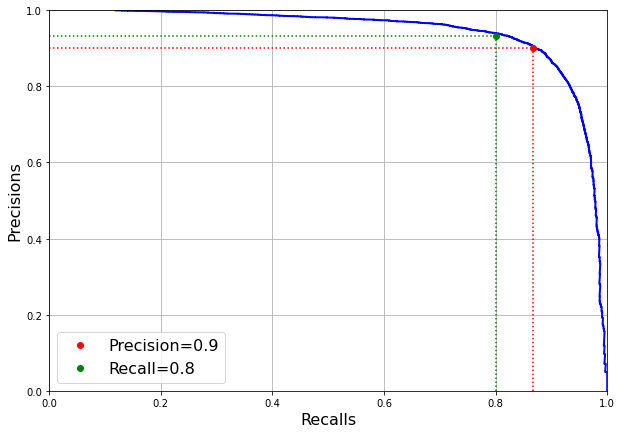

In [117]:
plt.figure(figsize=(10, 7))
plot_pres_recall(precisions, recalls)
plt.plot([recall_90_pres, recall_90_pres], [0.0, 0.9], 'r:')
plt.plot([0.0, recall_90_pres], [0.9, 0.9], 'r:')
plt.plot([recall_90_pres], [0.9], 'ro', label='Precision=0.9')

plt.plot([0.0, .8], [pres_80_recall, pres_80_recall], 'g:')
plt.plot([0.8, .8], [0.0, pres_80_recall], 'g:')
plt.plot([0.8], [pres_80_recall], 'go', label='Recall=0.8')
plt.legend(loc='lower left', fontsize=16)
plt.show()

___
* The metrics change with the changing threshold values. We can generate different confusion matrices and compare the various metrics that we discussed in the previous section. But that would not be a prudent thing to do. Instead, what we can do is generate a plot between some of these metrics so that we can easily visualize which threshold is giving us a better result.

**The AUC-ROC curve solves just that problem!**


https://www.analyticsvidhya.com/blog/2020/06/auc-roc-curve-machine-learning/

___
# ROC Curve:
* The Receiver Operator Characteristic (ROC) curve is an evaluation metric for binary classification problems. It is a probability curve that plots the TPR against FPR at various threshold values and essentially separates the ‘signal’ from the ‘noise’.

* Once again there is a tradeoff: the higher the recall (TPR), the more false positives
(FPR) the classifier produces. The dotted line represents the ROC curve of a purely
random classifier; a good classifier stays as far away from that line as possible (toward
the top-left corner).


In [118]:
from sklearn.metrics import roc_curve

In [124]:
fpr, tpr, threshold_roc = roc_curve(y_train_6, scores)

In [138]:
def plot_roc(fpr, tpr):
    plt.plot(fpr, tpr, 'b-', linewidth=2)
    plt.plot([0, 1], [0, 1], 'b--')
    plt.title('ROC Curve', fontsize=16)
    plt.xlabel('FPR (Fall_out)', fontsize=16)
    plt.ylabel('TPR (Recall, Sensitivity)', fontsize=16)
    plt.axis([0,1, 0,1])
    plt.grid(True)

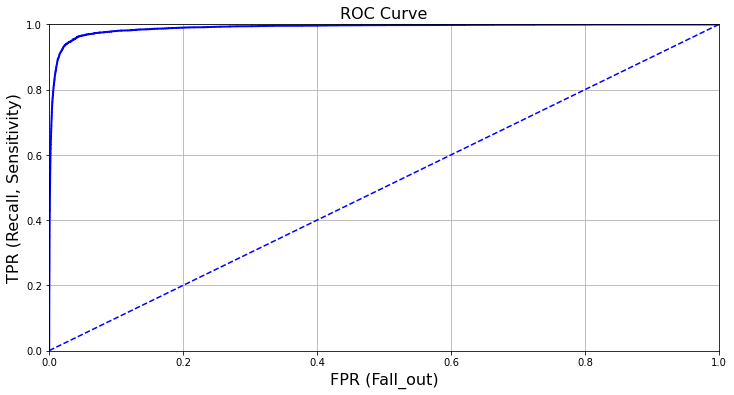

In [139]:
plt.figure(figsize=(12, 6))
plot_roc(fpr, fnr)
plt.show()

**The dashed line represents a totally random calssifier, where it classify randomly and get 50% probability of correct classifications**

___
## AUC score:
* The Area Under the Curve (AUC) is the measure of the ability of a classifier to distinguish between classes and is used as a summary of the ROC curve.
* The higher the AUC, the better the performance of the model at distinguishing between the positive and negative classes.


1) When **AUC = 1**, then the classifier is able to perfectly distinguish between all the Positive and the Negative class points correctly.\
2) when **AUC = 0**, then the classifier would be predicting all Negatives as Positives, and all Positives as Negatives.\
3) When **0.5<AUC<1**, there is a high chance that the classifier will be able to distinguish the positive class values from the negative class values.\
4) When **AUC=0.5**, then the classifier is not able to distinguish between Positive and Negative class points. Meaning either the classifier is predicting random class or constant class for all the data points.



In [140]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_6, scores)

0.9900837711161584

In [142]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)
y_probas_forest = cross_val_predict(forest_clf, x_train, y_train_6, cv=3,
                                    method="predict_proba")

In [ ]:
y_predict_forest = cross_val_predict(forest_clf, x_train, y_train_6, cv=3, method="decision_function")